In [9]:
import kagglehub

path = kagglehub.dataset_download("kokykg/malware-detection-with-images")

print("Path to dataset files:", path)

Path to dataset files: /home/drunkencloud/.cache/kagglehub/datasets/kokykg/malware-detection-with-images/versions/2


In [10]:
import os

train_dir = os.path.join(path, "DetectionDataset/splittedDataset/train")
val_dir = os.path.join(path, "DetectionDataset/splittedDataset/val")
test_dir = os.path.join(path, "DetectionDataset/splittedDataset/test")

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 3769 images belonging to 2 classes.
Found 808 images belonging to 2 classes.
Found 809 images belonging to 2 classes.


In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

/home/drunkencloud/work/course/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1749725796.679848    8630 service.cc:152] XLA service 0x79bd34006720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749725796.679879    8630 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-06-12 16:26:36.771300: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749725797.172522    8630 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/118 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.4922 - loss: 2.2583  

I0000 00:00:1749725805.823573    8630 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - accuracy: 0.7313 - loss: 1.8463

2025-06-12 16:27:22.804997: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_151_0', 44 bytes spill stores, 44 bytes spill loads

2025-06-12 16:27:23.153922: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_151', 484 bytes spill stores, 484 bytes spill loads

2025-06-12 16:27:28.414259: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_151', 64 bytes spill stores, 64 bytes spill loads



118/118 ━━━━━━━━━━━━━━━━━━━━ 55s 371ms/step - accuracy: 0.7317 - loss: 1.8435 - val_accuracy: 0.4913 - val_loss: 1.0620
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 24s 199ms/step - accuracy: 0.8215 - loss: 0.6628 - val_accuracy: 0.5792 - val_loss: 0.6685
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 170ms/step - accuracy: 0.8440 - loss: 0.4202 - val_accuracy: 0.8045 - val_loss: 0.7903
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 18s 151ms/step - accuracy: 0.8490 - loss: 0.3671 - val_accuracy: 0.8527 - val_loss: 0.3570
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 22s 185ms/step - accuracy: 0.8695 - loss: 0.2906 - val_accuracy: 0.6733 - val_loss: 7.7261
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 20s 172ms/step - accuracy: 0.8786 - loss: 0.3090 - val_accuracy: 0.7562 - val_loss: 0.7385
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 178ms/step - accuracy: 0.8865 - loss: 0.2560 - val_accuracy: 0.7983 - val_loss: 0.4647
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 21s 177ms/step - accuracy: 0.8955 - loss: 0.2547 - val

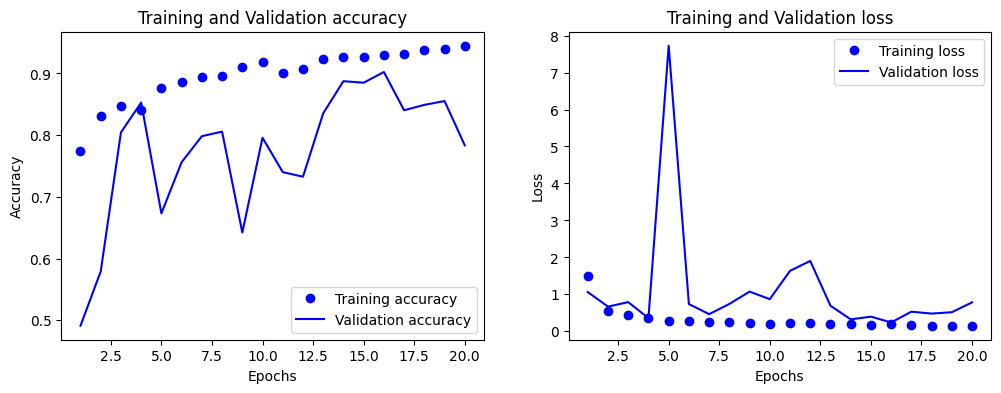

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [15]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')

25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8111 - loss: 0.6838

2025-06-12 16:34:01.952451: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_151', 64 bytes spill stores, 64 bytes spill loads



26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 219ms/step - accuracy: 0.8098 - loss: 0.6930
Test accuracy: 0.79


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


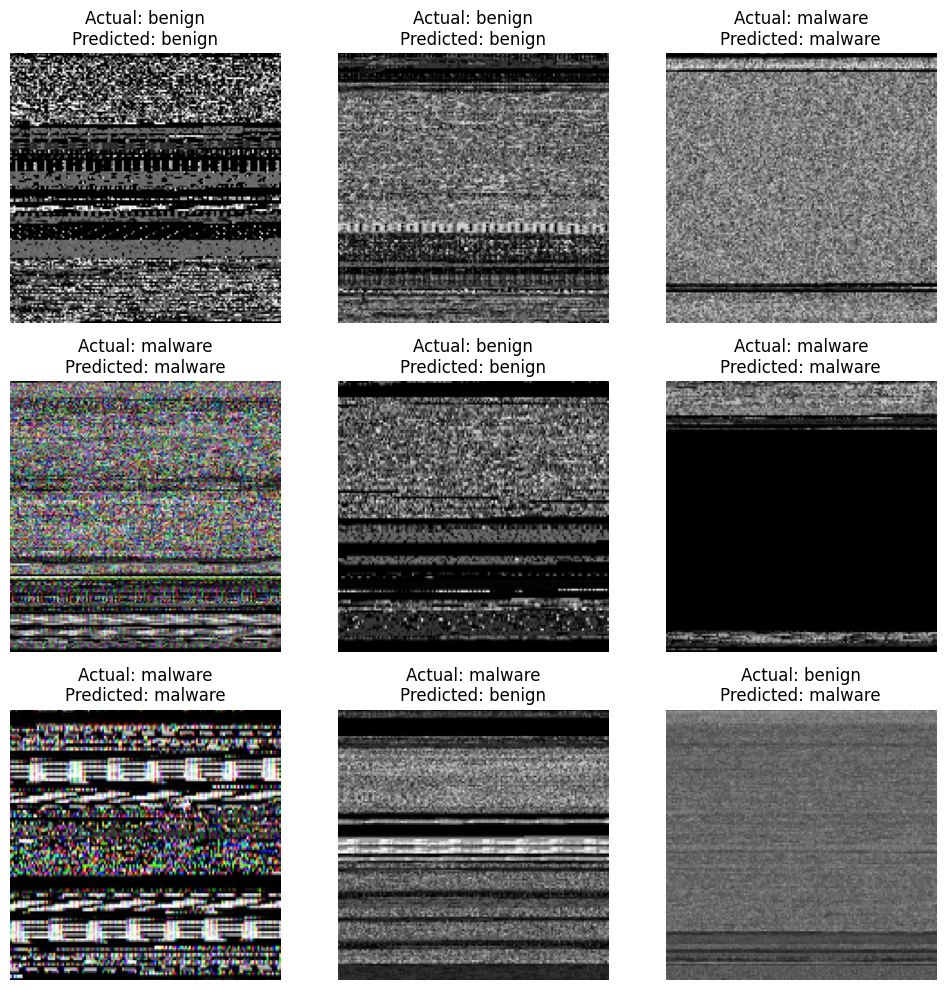

In [17]:
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

class_labels = list(test_generator.class_indices.keys())

def get_random_test_images(generator, num_images):
    indices = random.sample(range(len(generator.filenames)), num_images)
    images, labels = [], []
    for idx in indices:
        img_path = os.path.join(generator.directory, generator.filenames[idx])
        img = load_img(img_path, target_size=(150, 150))
        img_array = img_to_array(img)
        img_array /= 255.0
        images.append(img_array)
        labels.append(generator.labels[idx])
    return np.array(images), np.array(labels), indices

num_images = 9
images, labels, indices = get_random_test_images(test_generator, num_images)

predictions = model.predict(images)
predicted_classes = [class_labels[int(pred.flatten()[0] > 0.5)] for pred in predictions]
actual_classes = [class_labels[label] for label in labels]

plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f'Actual: {actual_classes[i]}\nPredicted: {predicted_classes[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()